# Visualize Attention Maps

This notebook focuses on visualizing attention maps from different models for the same input image.

In [4]:
import os
import re
import sys
import json
import random
random.seed(42)
from typing import Optional, Any
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

package_root = os.path.dirname(os.getcwd())
sys.path.insert(0, package_root)

import torch
torch.manual_seed(42)

import numpy as np
np.random.seed(42)

import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
import matplotlib.patches as patches
import seaborn as sns

from sparse_detector.visualizations.palette import ColorPalette


sns.set(font_scale=1.4)
sns.set_style("whitegrid", {
    "grid.linestyle": 'dashed',
    "axes.edgecolor": '#475569',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['Arial',
        'Droid Sans',
        'sans-serif'
    ],
})
%matplotlib inline

coco_path = Path(package_root) / "data" / "COCO" / "val2017"

# Load coco annotation
with open(coco_path.parent / "annotations" / "instances_val2017.json") as f:
    coco_annos = json.load(f)

annotations = coco_annos['annotations']
def get_annos_for_img(img_id: int) -> Any:
    annos = filter(lambda x: x['image_id'] == img_id, annotations)
    return list(annos)

**Load the sample image**

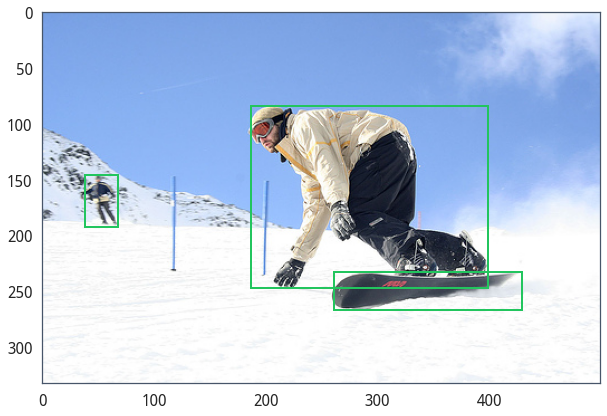

In [5]:
image_id = 350405
img = Image.open(coco_path / (f"{image_id}".rjust(12, '0') + '.jpg'))

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img)
ax.grid(False)

img_annos = get_annos_for_img(image_id)
for img_anno in img_annos:
    x, y, w, h = img_anno['bbox']
    ax.add_patch(patches.Rectangle((x, y), w, h, fill=False, edgecolor=ColorPalette.GREEN, lw=2))

**Load attention maps for the input image from different models**

In [21]:
fname = f"{image_id}".rjust(12, '0') + '.pt'

attn_maps = torch.load(Path(package_root) / "outputs" / "attentions" / "alpha_entmax" / fname, map_location="cpu")
attn_maps['attentions'].size()

torch.Size([100, 25, 38])

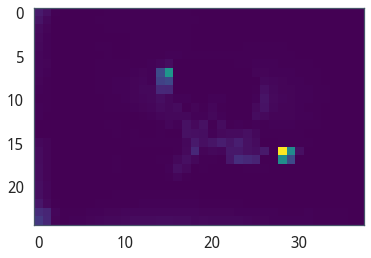

In [27]:
plt.imshow(attn_maps['attentions'][66].detach().cpu(), cmap='viridis')
plt.grid(False)